In [1]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

AnnData object with n_obs × n_vars = 333664 × 1198
    obs: 'Area', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'batch', 'SAHA_Sample', 'SAHA_name', 'Insitutype_Labelled', 'Insitutype_Broad'
    uns: 'Insitutype_Broad_colors', 'Insitutype_Labelled_colors', 'SAHA_name_colors', 'SAHA_organcode_colors', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'normalized', 'normalized_all', 'raw'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 373554 × 64
    obs: 'Area', 'CenterX_global_px', 'CenterY_global_px', 'cell_id', 'batch', 'SAHA_name', 'leiden', 'leiden_0.5', 'leiden_1', 'celltype_mf', 'leiden_2', 'leiden_3'
    uns: 'SAHA_name_colors', 'leiden', 'leiden_0.5_colors', 'leiden_1_colors', 'leiden_2_colors', 'leiden_3_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap_after_harmony

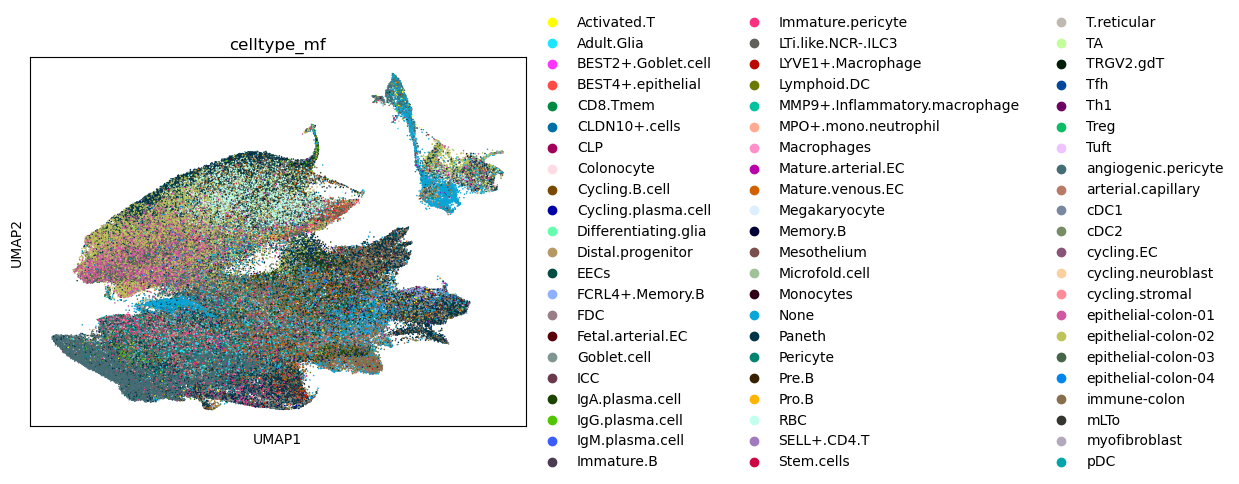

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


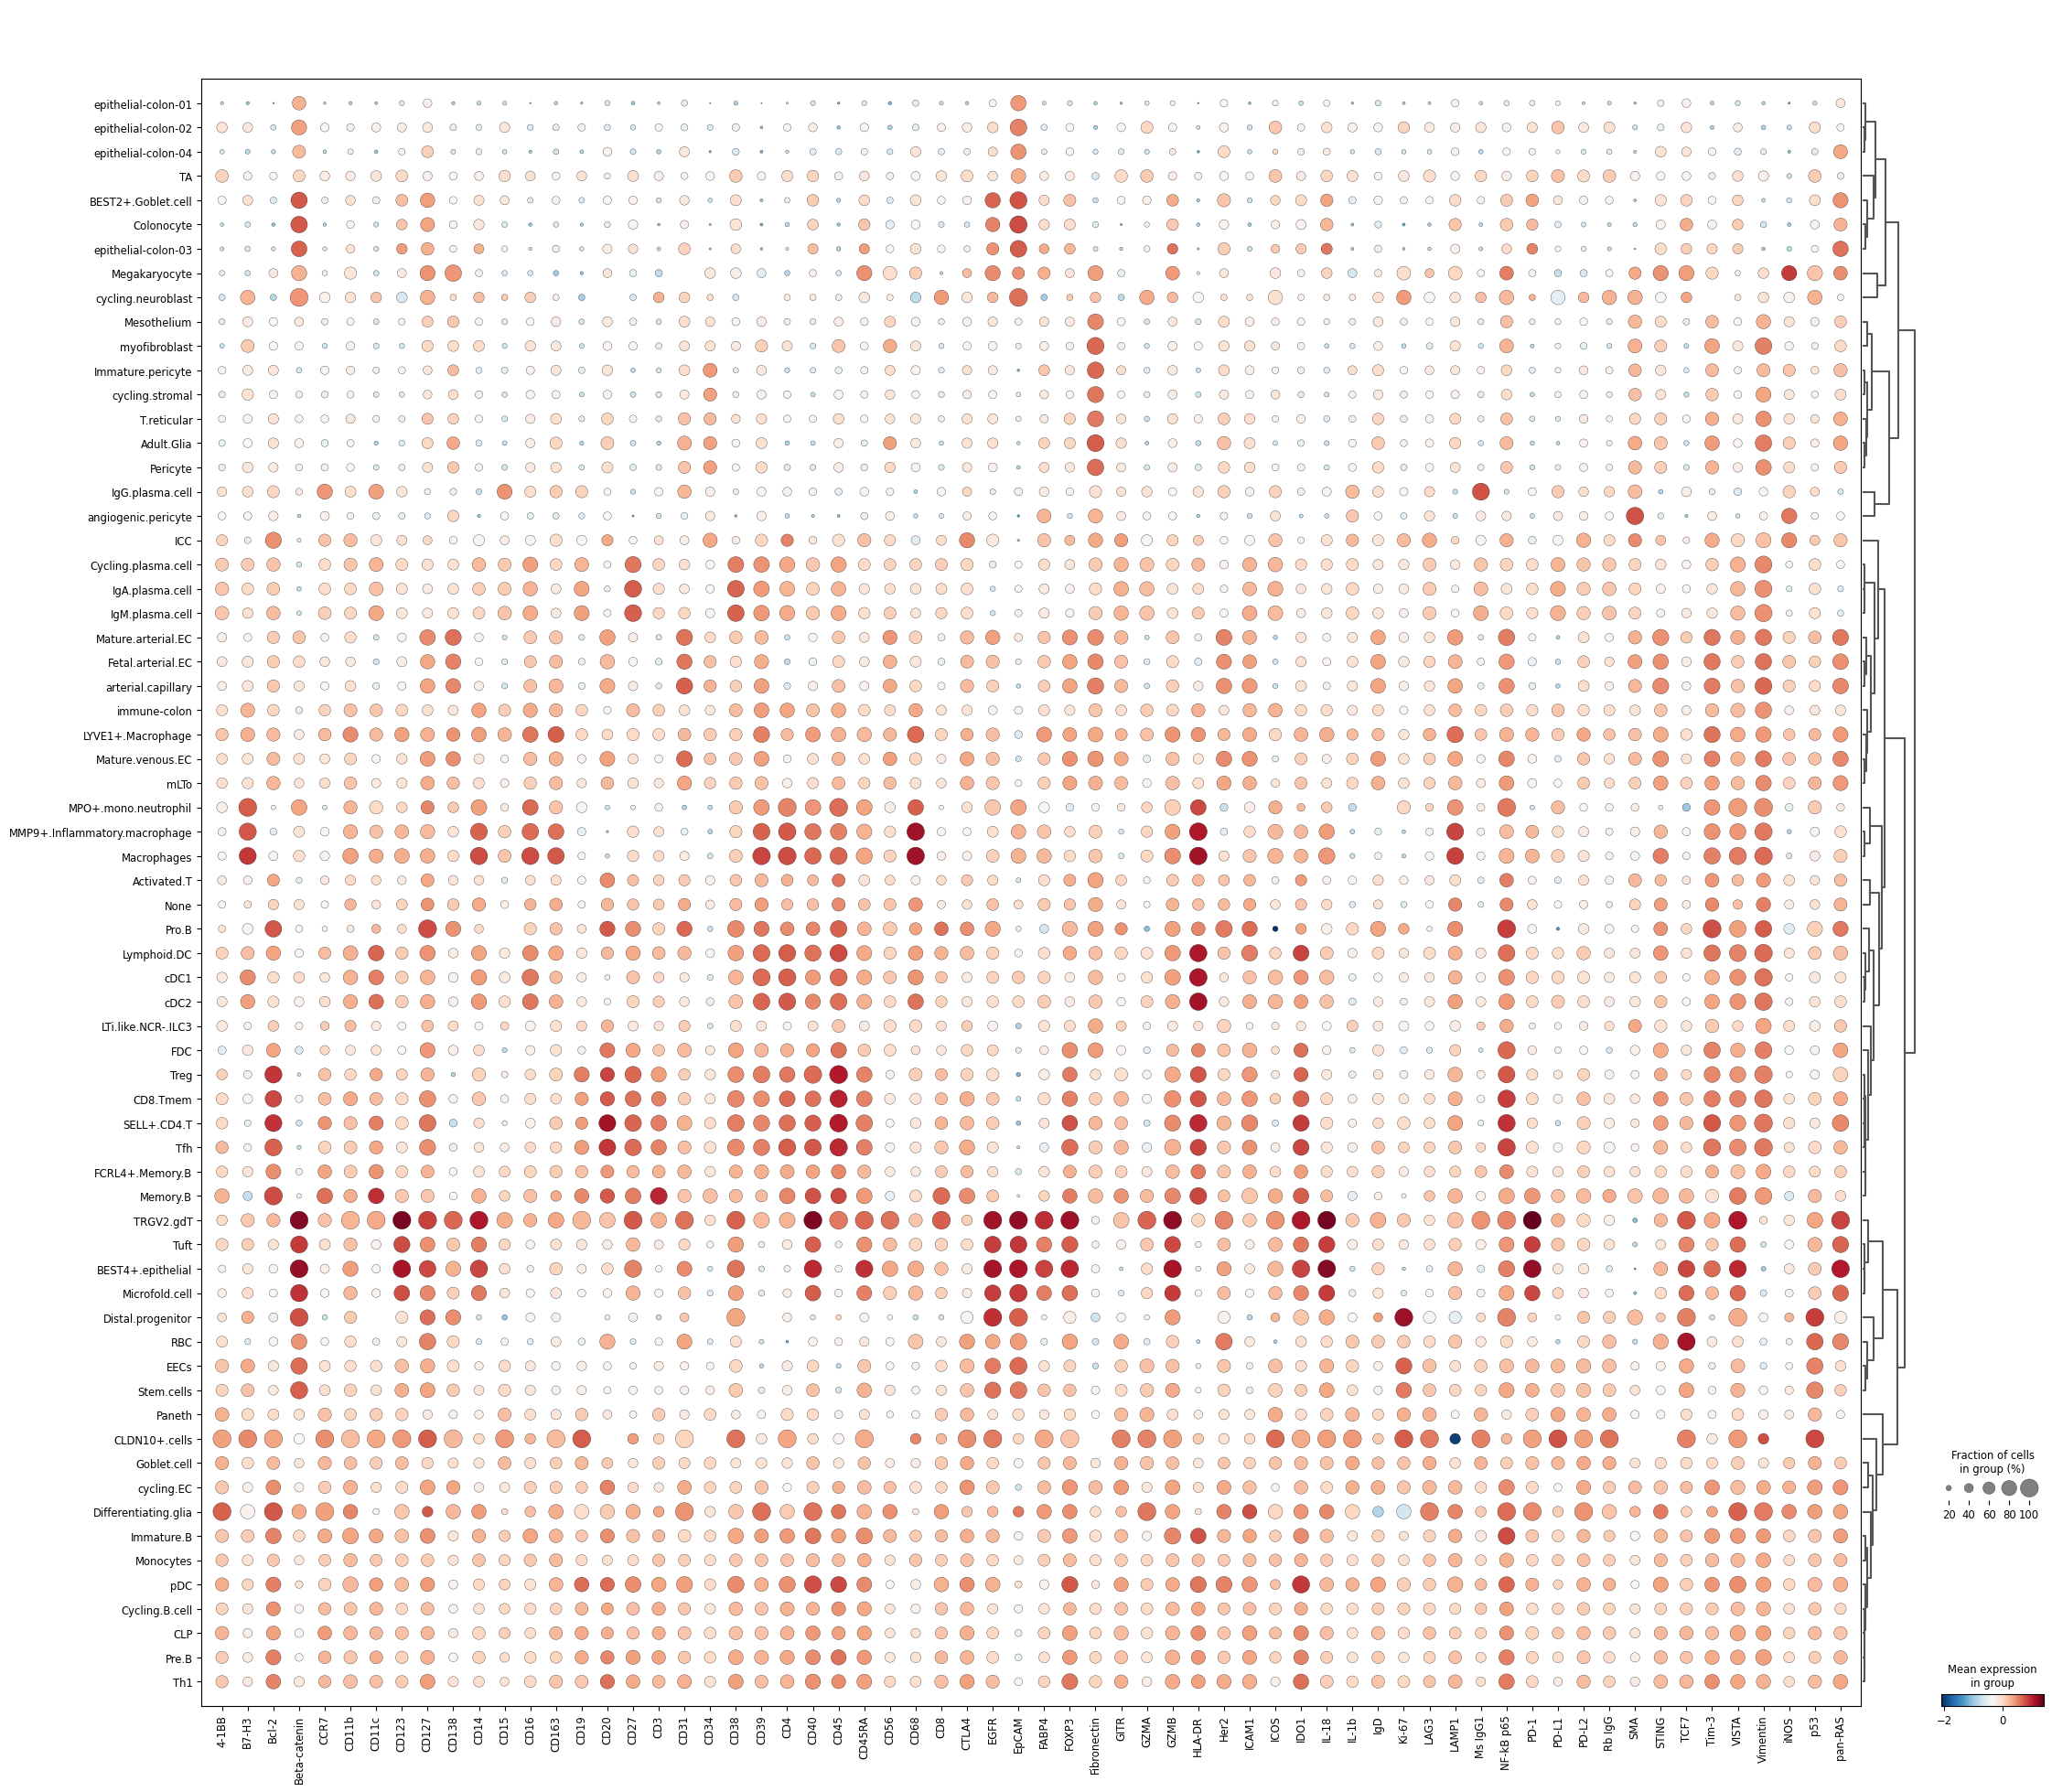

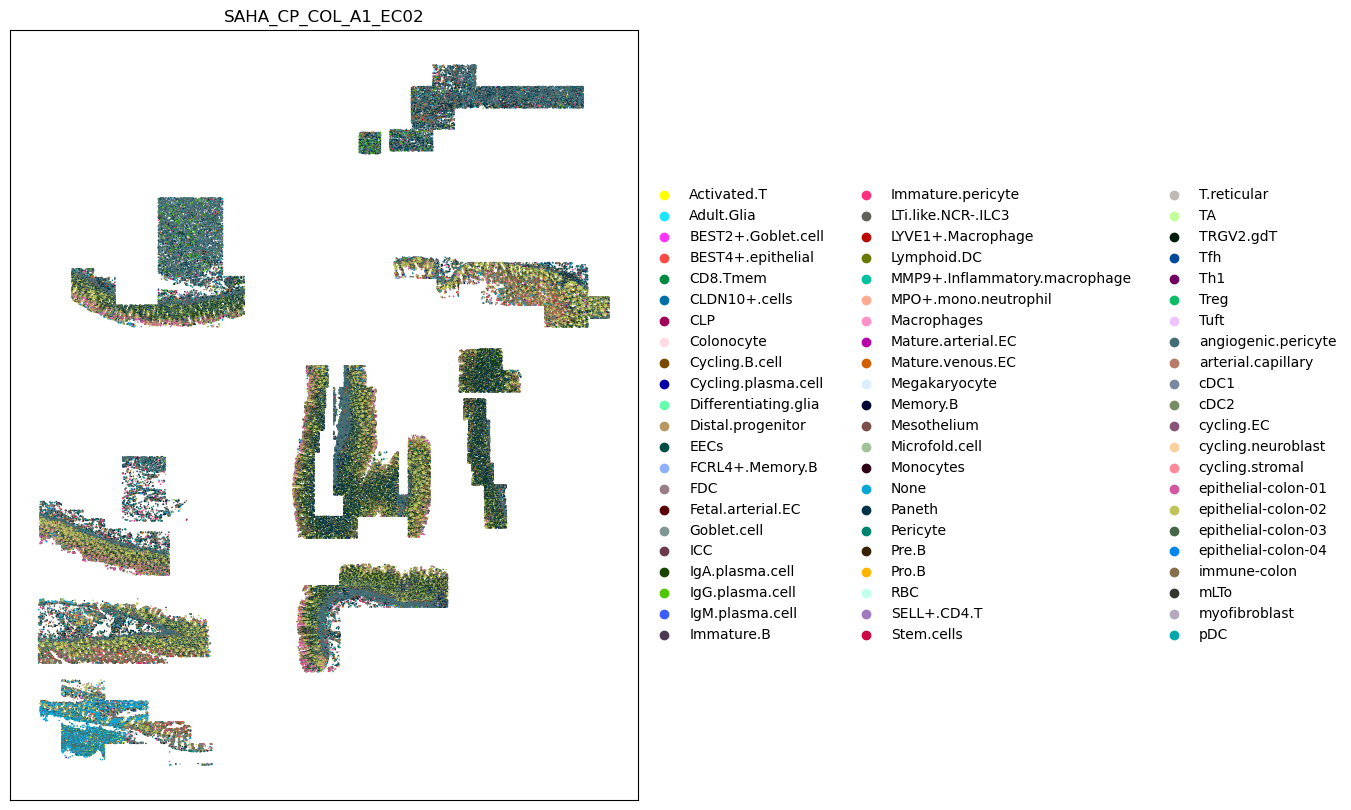

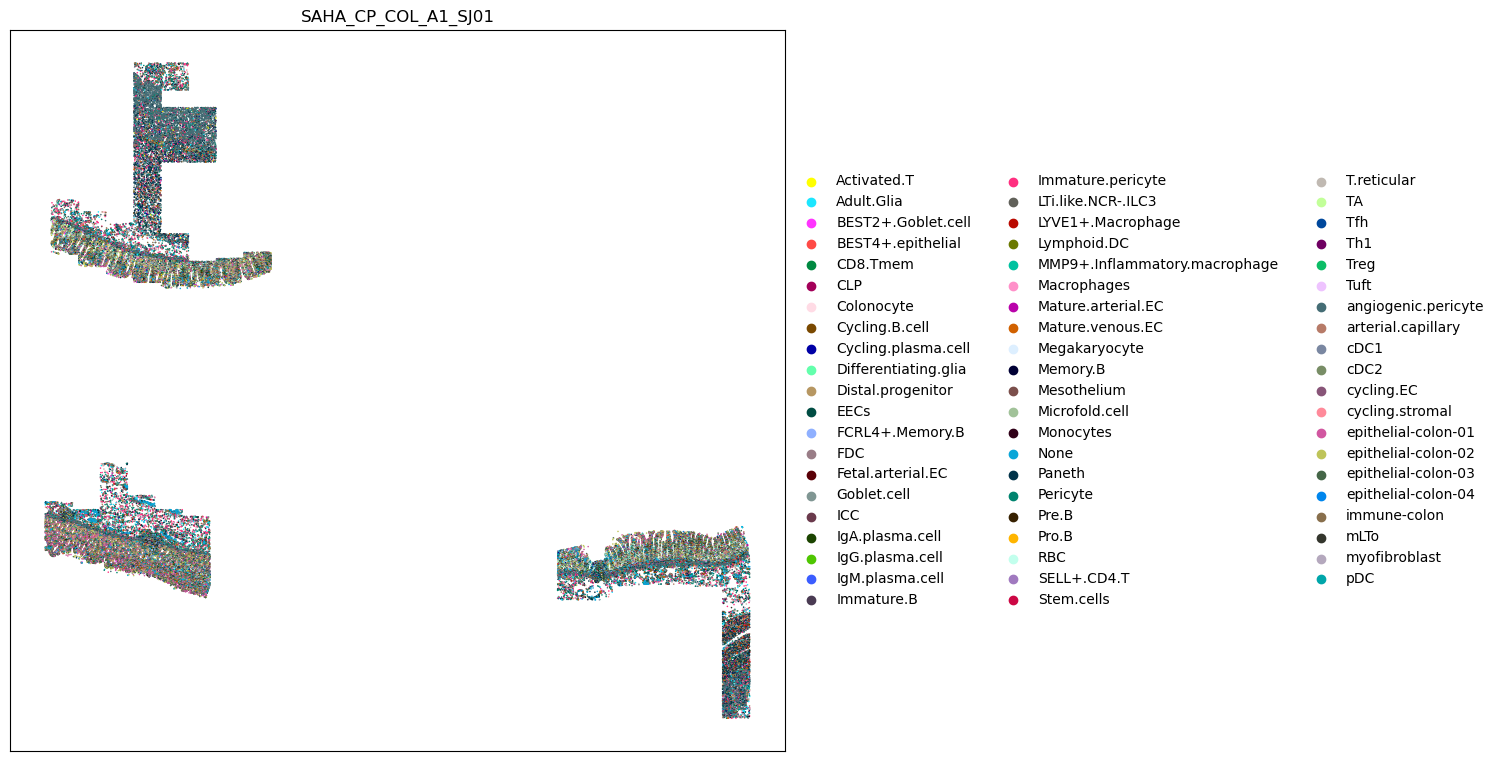

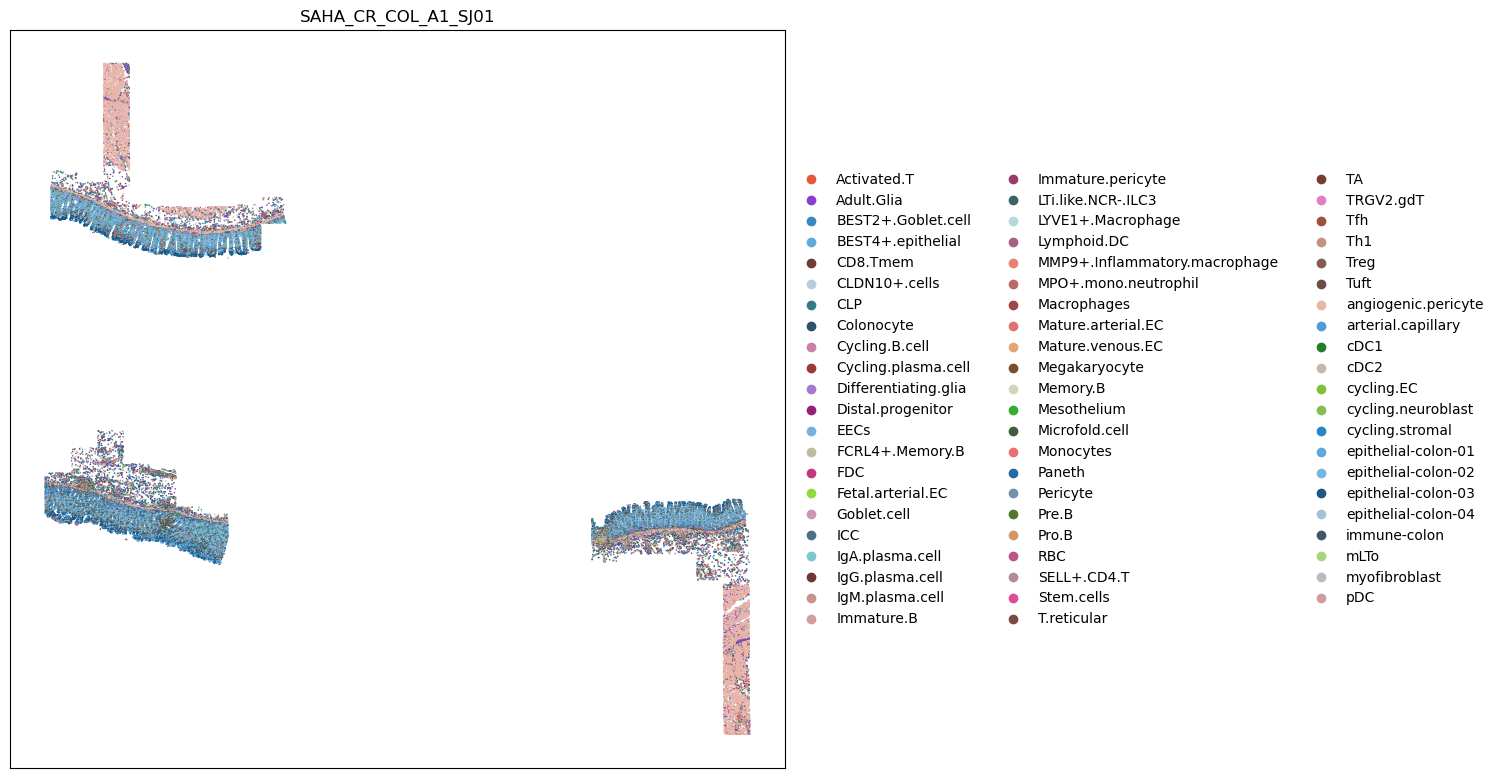

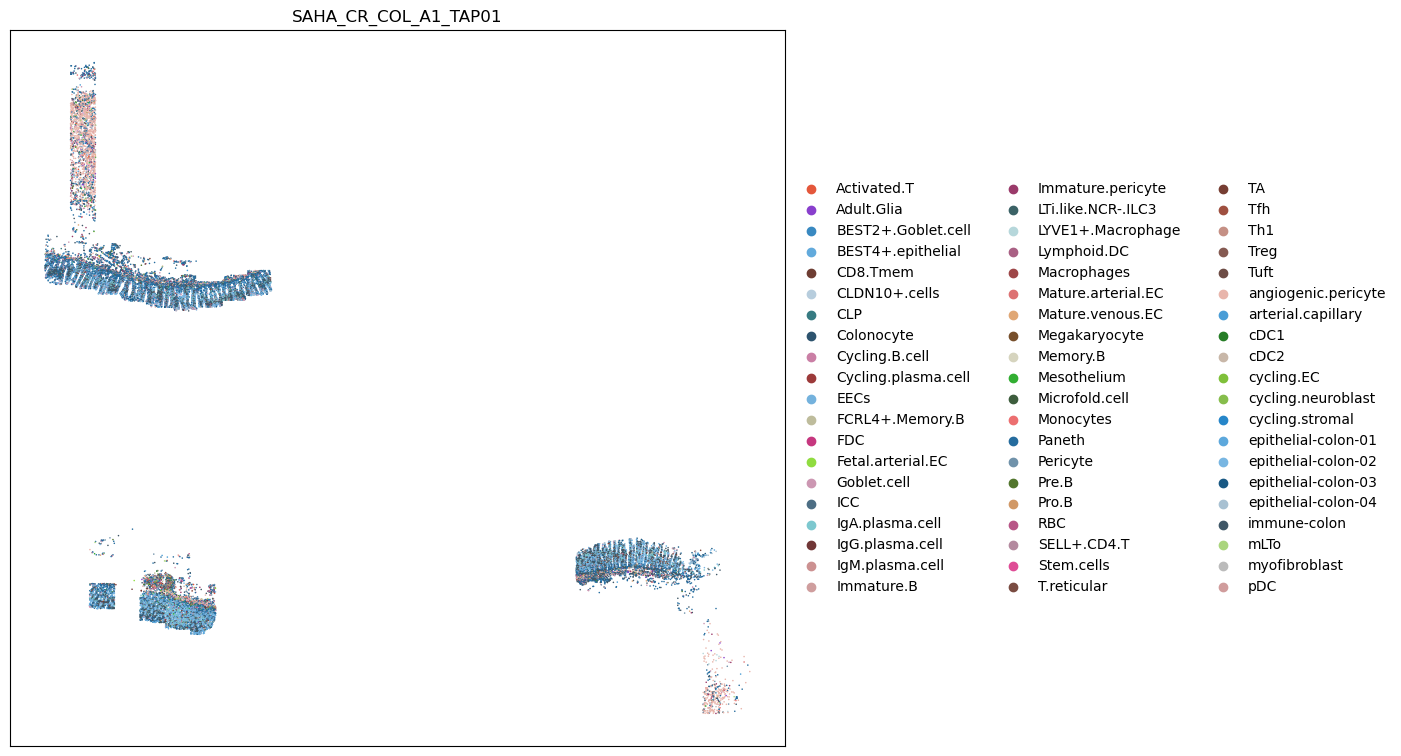

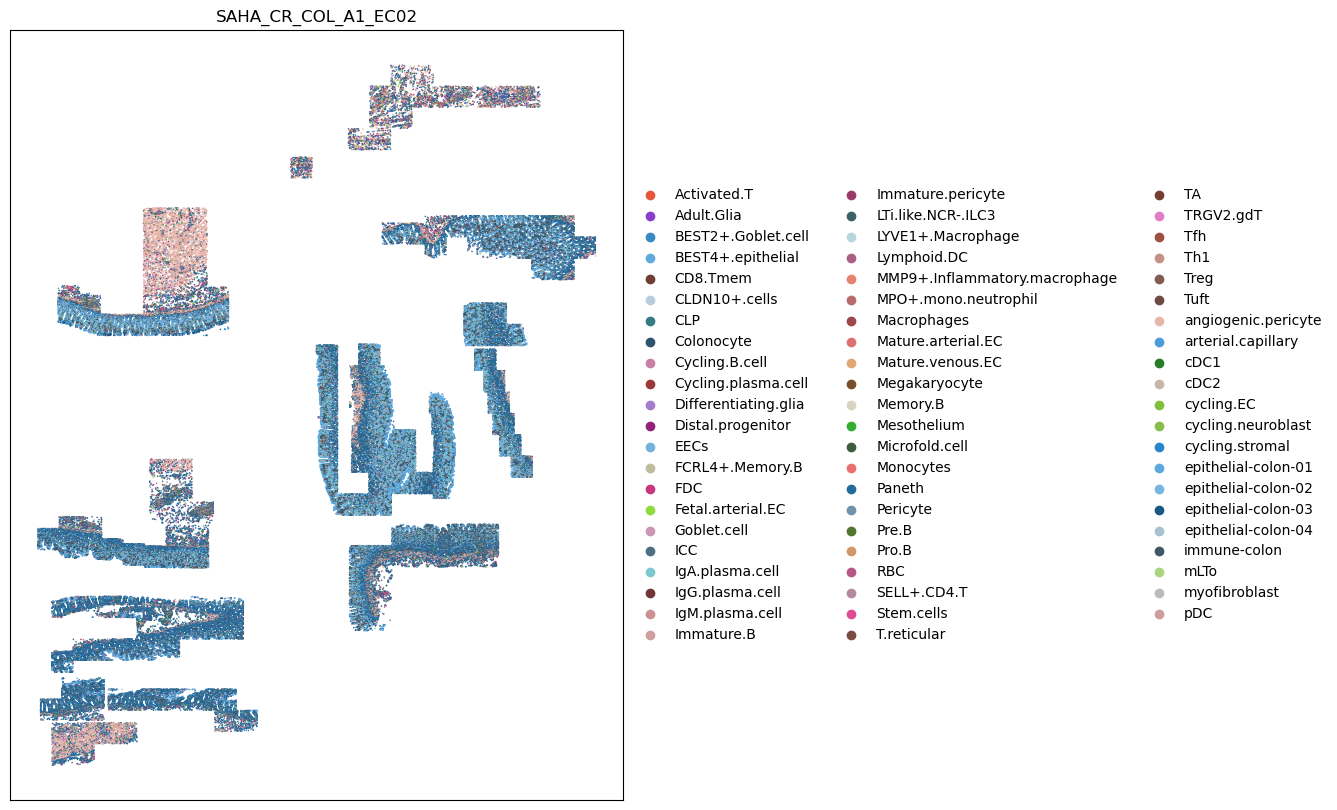

In [2]:
tissue = 'COL'
RNA = ad.read_h5ad(f'RNA_{tissue}.h5ad')
PR = ad.read_h5ad(f'PRT_{tissue}.h5ad')
df = pd.read_csv(f'matching_{tissue}_leiden_3.csv')
print(RNA)
print(PR)
print(df.columns)

PR.obs['celltype_mf'] = 'None'

# Extract indices and values as arrays
rna_indices = df['mod1_indx'].to_numpy()
pr_indices = df['mod2_indx'].to_numpy()
rna_values = RNA.obs['Insitutype_Labelled'].to_numpy()

# Directly assign values using `.iloc`
PR.obs.iloc[pr_indices, PR.obs.columns.get_loc('celltype_mf')] = rna_values[rna_indices]
PR.write_h5ad(f'PRT_{tissue}.h5ad')

sc.pl.umap(PR, color='celltype_mf', size=5)
# sc.pl.umap(PR[PR.obs['celltype_mf']!='None'], color='celltype_mf', size=5)

sc.pp.scale(PR)
sc.pl.dotplot(PR, PR.var_names.to_list(), groupby='celltype_mf', dendrogram=True, log=True, cmap='RdBu_r')

for name in PR.obs['SAHA_name'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sc.pl.embedding(PR[PR.obs['SAHA_name']==name], "spatial", color='celltype_mf', ax=ax, s=5, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.set_title(name)

RNA.uns['Insitutype_Broad_colors'] = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#ff9896']
for name in RNA.obs['SAHA_name'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sc.pl.embedding(RNA[RNA.obs['SAHA_name']==name], "spatial", color='Insitutype_Labelled', ax=ax, s=5, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.set_title(name)

In [3]:
# Load the CSV file
color_df = pd.read_csv('Color_Code_Granular.csv')

# Create a color palette dictionary
color_palette = dict(zip(color_df['Insitutype_Labelled'], color_df['color_CellType']))

# Handle any None values by assigning 'lightgray' for them
color_palette['None'] = 'lightgray'  # explicitly set None to lightgray

# Ensure the color_palette includes all categories in 'SAHA_name' or 'celltype_mf'
# If a category is not in the palette, assign it 'lightgray'
for name in PR.obs['SAHA_name'].unique():
    if name not in color_palette:
        color_palette[name] = 'lightgray'

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"

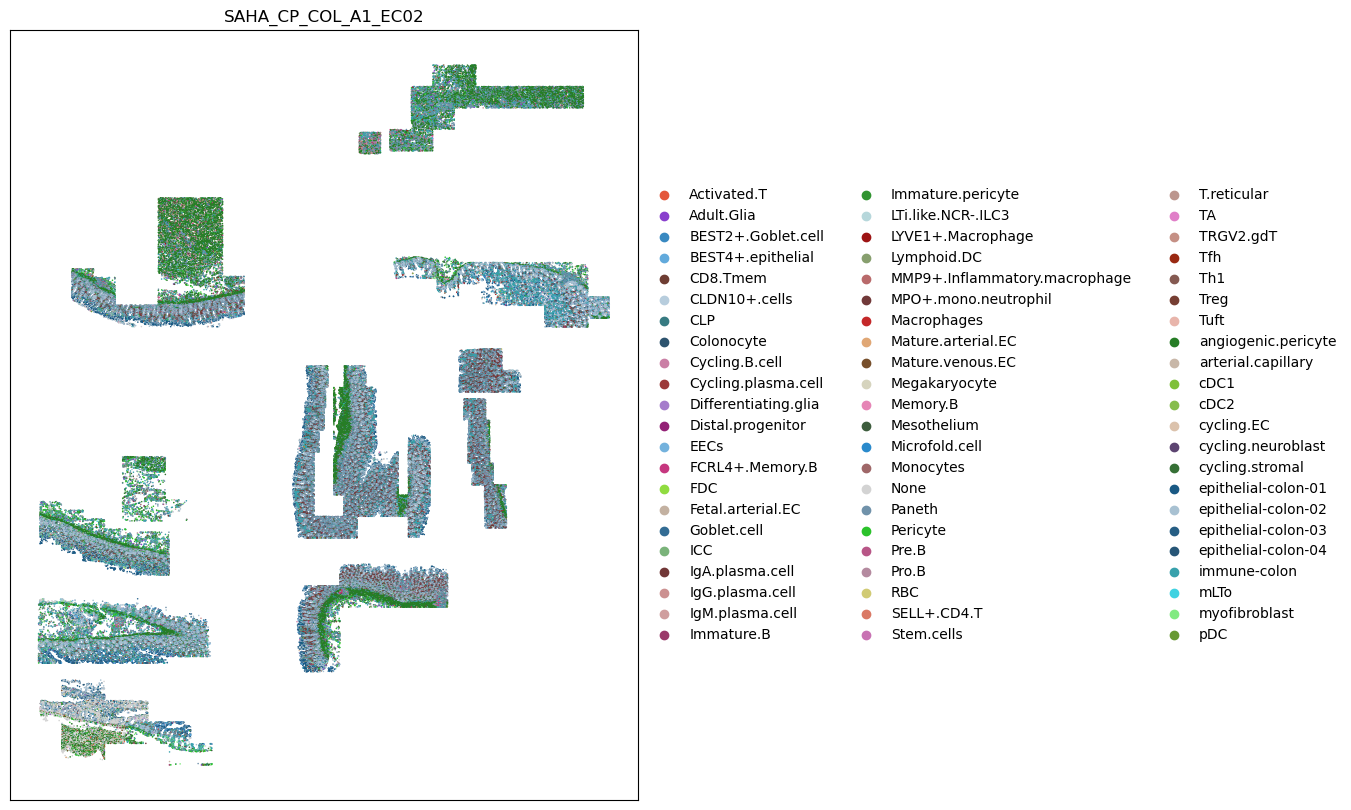

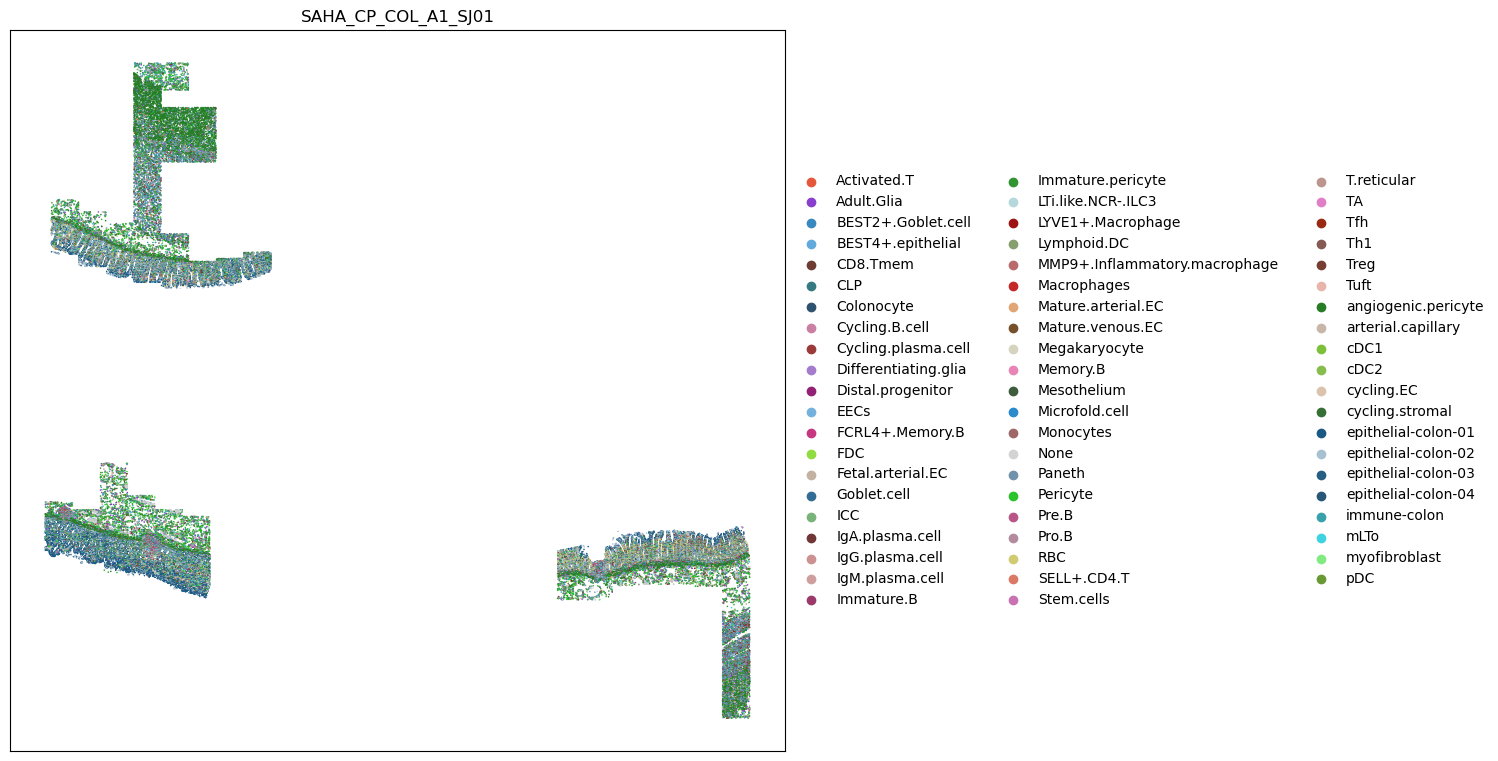

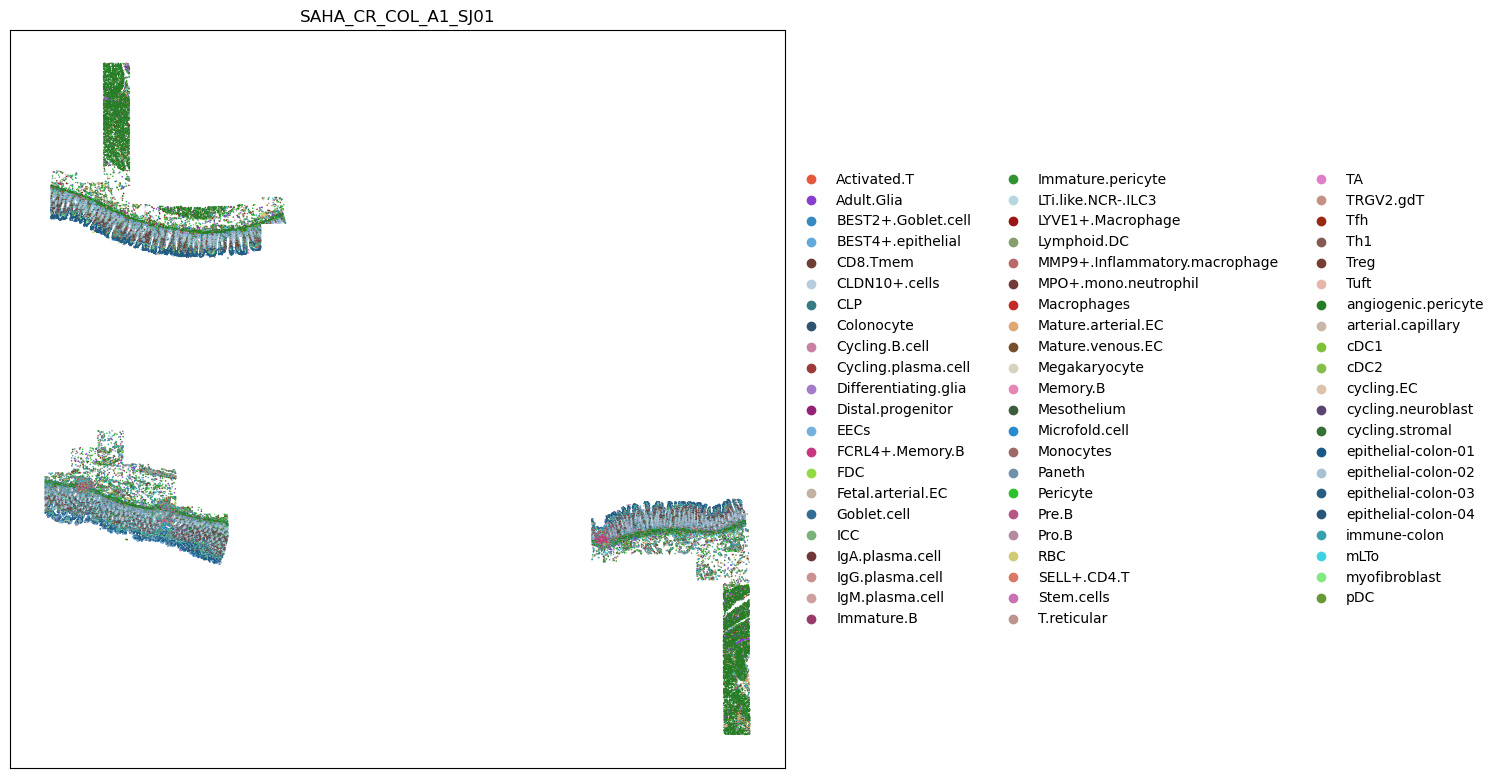

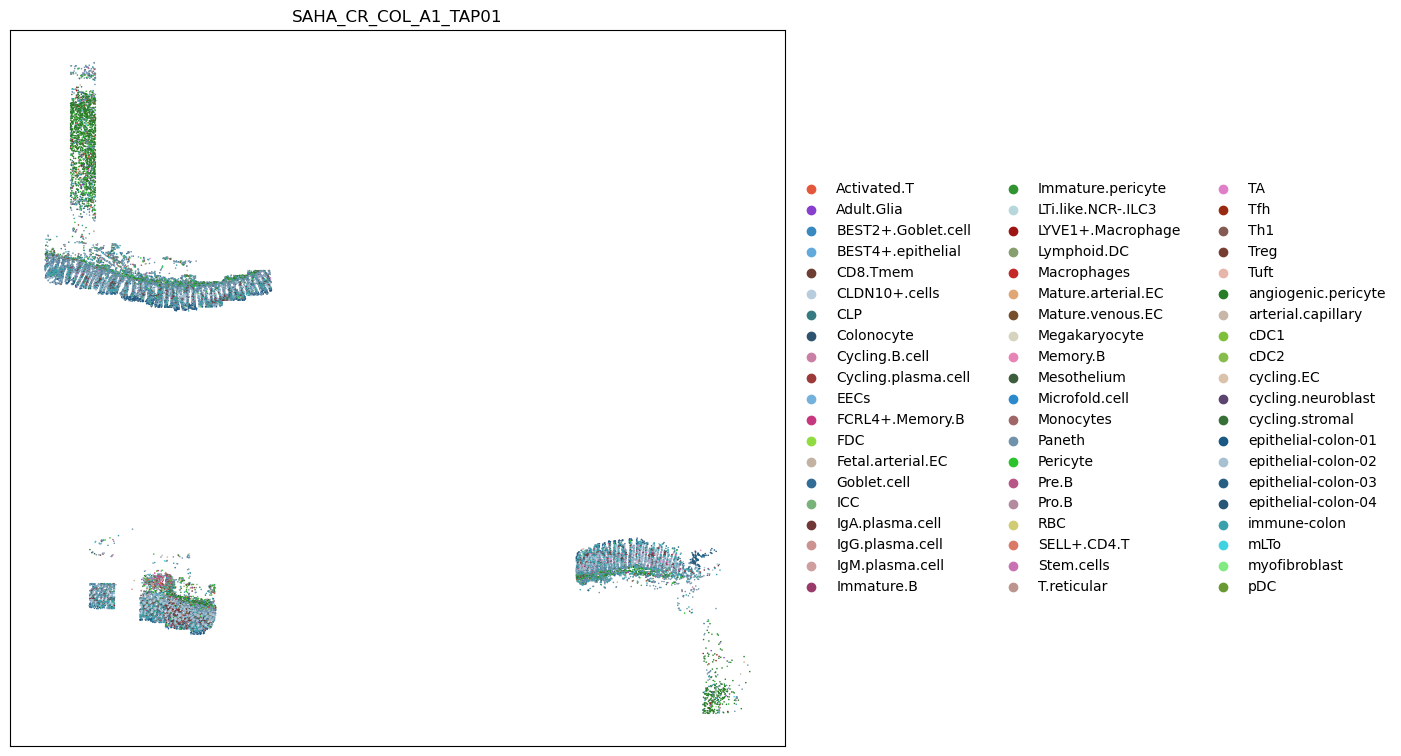

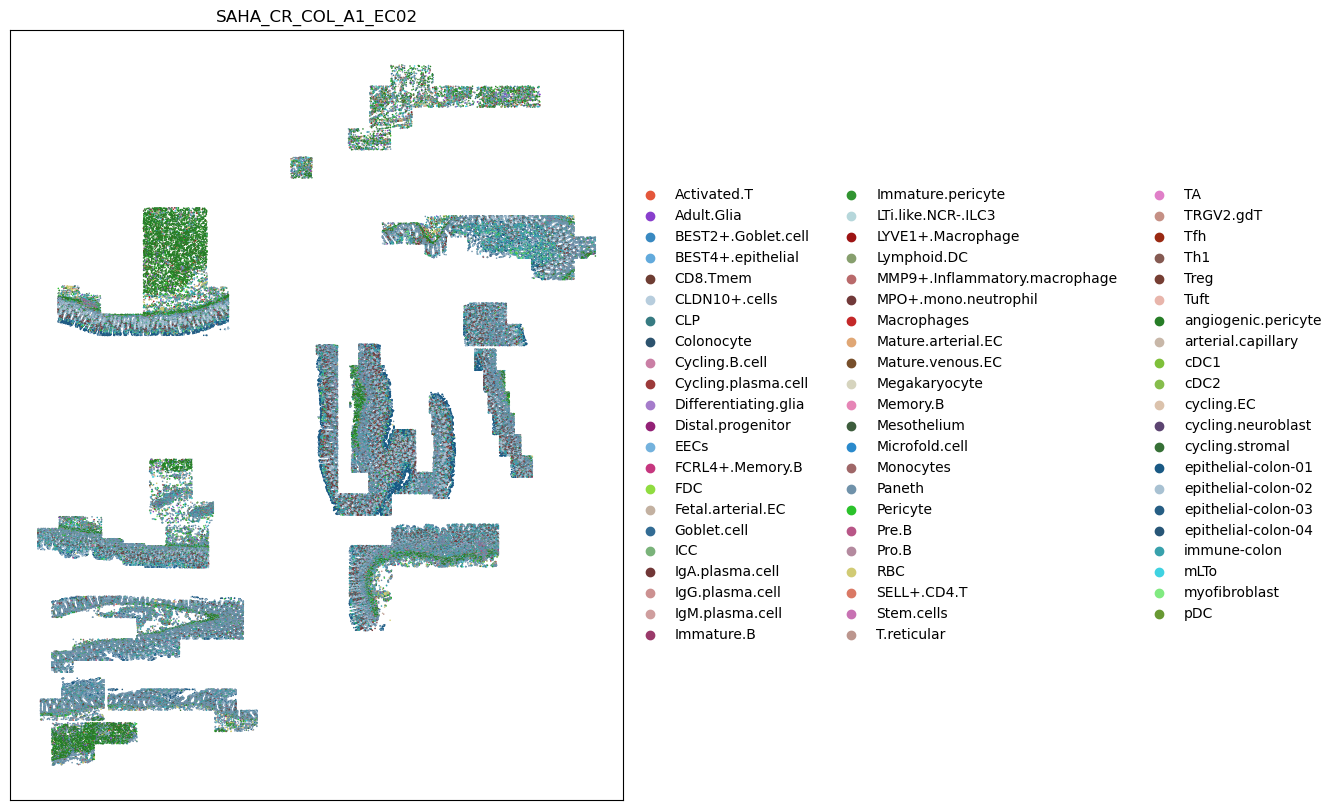

In [4]:
for name in PR.obs['SAHA_name'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sc.pl.embedding(PR[PR.obs['SAHA_name']==name], "spatial", color='celltype_mf', ax=ax, s=5, show=False, palette=color_palette)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.set_title(name)

for name in RNA.obs['SAHA_name'].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sc.pl.embedding(RNA[RNA.obs['SAHA_name']==name], "spatial", color='Insitutype_Labelled', ax=ax, s=5, show=False, palette=color_palette)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.set_title(name)

In [5]:
PRT_ALL = sc.read('SAHA_All_PRT_share.h5ad')
RNA_ALL = sc.read('SAHA_All_RNA_share.h5ad')

PRT_name = 'SAHA_CP_COL_A1_EC02'
RNA_name = 'SAHA_CR_COL_A1_EC02'

PR = PR[PR.obs['SAHA_name']==PRT_name].copy()
RNA = RNA[RNA.obs['SAHA_name']==RNA_name].copy()

PR.obs['fov'] = PRT_ALL[PRT_ALL.obs['SAHA_name']==PRT_name].obs['fov']
RNA.obs['fov'] = RNA_ALL[RNA_ALL.obs['SAHA_name']==RNA_name].obs['fov']

PR.obs['fov_int'] = pd.to_numeric(PR.obs['fov'], errors='coerce')
RNA.obs['fov_int'] = pd.to_numeric(RNA.obs['fov'], errors='coerce')

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


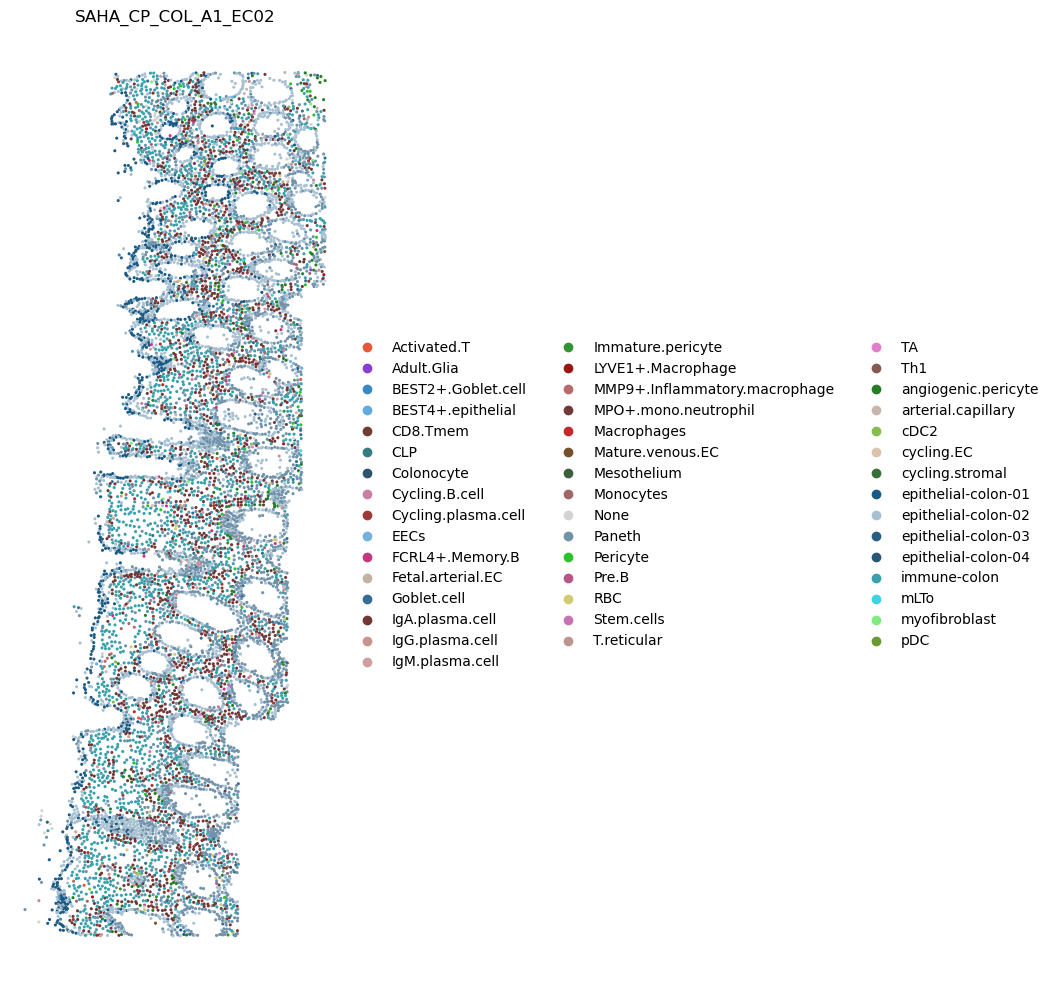

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


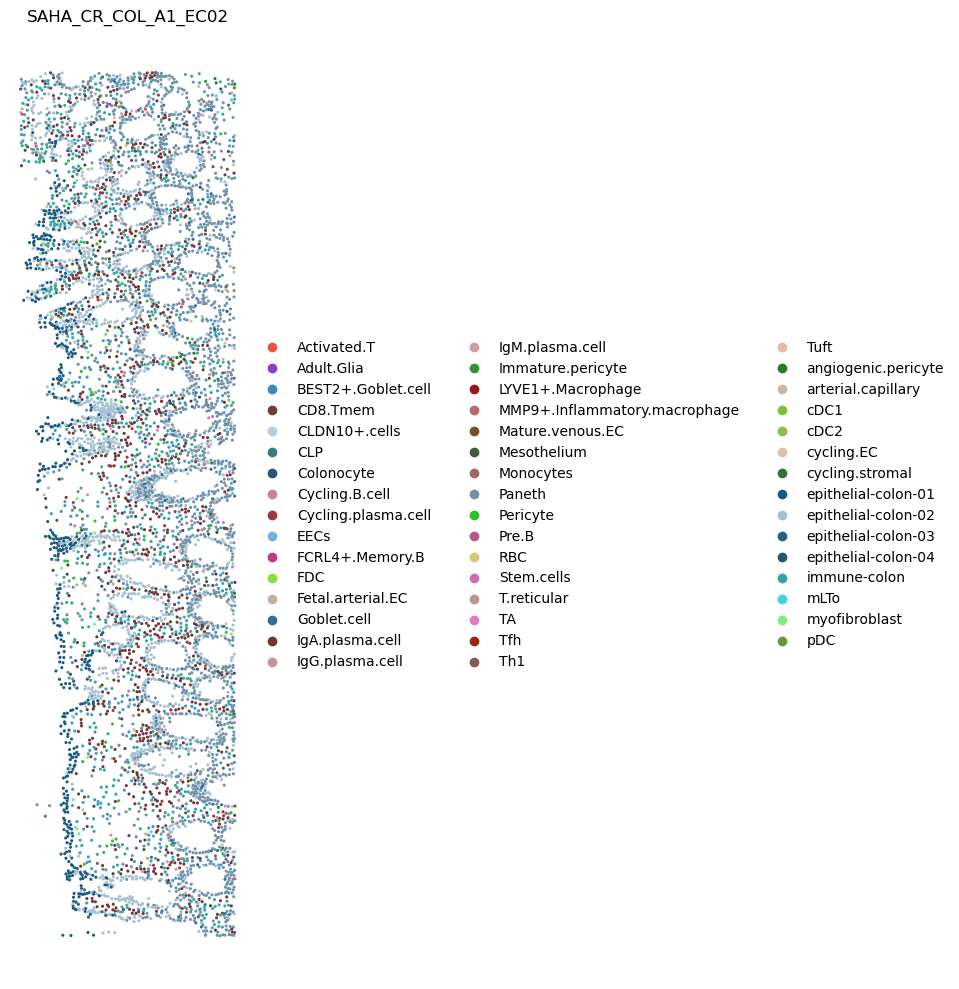

In [6]:
fovs_PRT = [79,80,81,82]
fovs_RNA = [79,81,84,88]

size=20

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.embedding(PR[PR.obs['fov_int'].isin(fovs_PRT)], "spatial", color='celltype_mf', ax=ax, s=size, show=False, palette=color_palette)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_facecolor('white')
ax.set_title(PRT_name)

# Remove the spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("COL_PRT_Granular.pdf", format='pdf', bbox_inches='tight')
plt.show()


RNA.obs['fov_int'] = pd.to_numeric(RNA.obs['fov'], errors='coerce')
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.embedding(RNA[RNA.obs['fov_int'].isin(fovs_RNA)], "spatial", color='Insitutype_Labelled', ax=ax, s=size, show=False, palette=color_palette)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_facecolor('white')
ax.set_title(RNA_name)

# Remove the spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("COL_RNA_Granular.pdf", format='pdf', bbox_inches='tight')
plt.show()

/mnt/scratch1/miniconda3/envs/rsc-luke/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


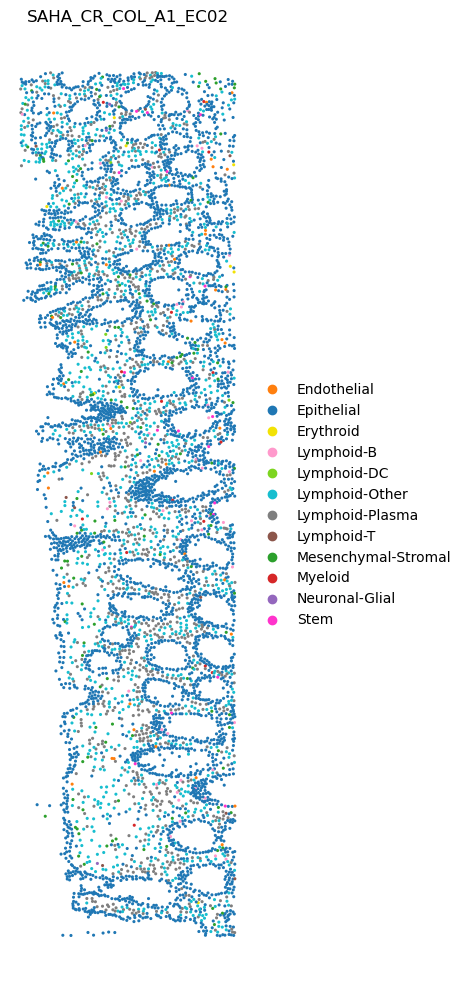

In [7]:
palette_RNA = ['#ff7f0e', #endo
           '#1f77b4', #epi
           '#f2e205', #ery
           '#ff99cc', #B
           '#7DD520', #DC
           '#17becf', #Other
           '#7f7f7f', #Plasma
           '#8c564b', #T
           '#2ca02c', #Mesen
           '#d62728', #Myeloid
           '#9467bd', #Neuro
           '#ff33cc', #Stem
]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.embedding(RNA[RNA.obs['fov_int'].isin(fovs_RNA)], "spatial", color='Insitutype_Broad', ax=ax, s=size, show=False, palette=palette_RNA)

# Customize the plot
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_aspect('equal')
ax.set_facecolor('white')
ax.set_title(RNA_name)

# Remove the spines (borders)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig("COL_RNA.pdf", format='pdf', bbox_inches='tight')
plt.show()